# Data analysis: Raw dataset
This notebook gives a overview of the raw dataset of the smartpunch data collection.

In [115]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [116]:
from timeseries_helpers import timeseries_plotter

In [117]:
with open('../Datasets/Raw_Data/complete_smartpunch_dataset_7606punches.json', 'r') as f:
    ds = json.load(f)

In [3]:
def data_to_list(raws, axis='x'):
    data = []
    for e in raws:
        data.append(e[axis])
    return data

In [4]:
def data_to_list2(raws, axis='x'):
    return [e[axis] for e in raws]

In [15]:
ds[0]

{'_id': {'$oid': '5c5e933a6d627a480d243b88'},
 'label': 'upper-cut',
 'hand': 'right',
 'annotator': '0',
 'count': 149,
 'periodNS': 1489000000,
 'raws': [{'_id': {'$oid': '5c5e933a6d627a480d243af3'},
   'timestamp': '0',
   'x': 6.7932233810424805,
   'y': -2.383251428604126,
   'z': 2.9623143672943115},
  {'_id': {'$oid': '5c5e933a6d627a480d243af4'},
   'timestamp': '2000000',
   'x': 6.601797580718994,
   'y': -2.871387243270874,
   'z': 3.359523057937622},
  {'_id': {'$oid': '5c5e933a6d627a480d243af5'},
   'timestamp': '14000000',
   'x': 6.343372821807861,
   'y': -3.129812002182007,
   'z': 3.5581271648406982},
  {'_id': {'$oid': '5c5e933a6d627a480d243af6'},
   'timestamp': '12000000',
   'x': 5.962913990020752,
   'y': -3.136990547180176,
   'z': 3.625126361846924},
  {'_id': {'$oid': '5c5e933a6d627a480d243af7'},
   'timestamp': '4000000',
   'x': 5.582455158233643,
   'y': -3.1034910678863525,
   'z': 3.6083765029907227},
  {'_id': {'$oid': '5c5e933a6d627a480d243af8'},
   'tim

In [64]:
ds[0].keys()
buff = [(i,e['label'],e['hand'],e['periodNS']) for i,e in enumerate(ds)]

In [99]:
buff[0][3]
periodSum = 0
minPeriod = 1000000000000
shortestBorder = 50000000
minIdx = 0
for i,el in enumerate(buff):
    periodSum += el[3]
    if (el[3] < minPeriod) and (el[3] > shortestBorder):
        minPeriod = el[3]
        minIdx = i
    if el[3] < shortestBorder:
        print("Found irregular short period length of {}ms at index: {}".format(el[3]/1000000,i))
periodAve = periodSum/len(buff)
periodAveMS = periodAve/1000000
sampleAve = periodAveMS/10
minPeriodMS = minPeriod/1000000
print("Ave period len: {}ms with a ave of {} with the shortest period: {}ms (at index: {})".format(periodAveMS,sampleAve,minPeriodMS,minIdx))

Found irregular short period length of 24.0ms at index: 6065
Ave period len: 1519.022745201157ms with a ave of 151.9022745201157 with the shortest period: 266.0ms (at index: 5953)


In [100]:
ds[5953]

{'_id': {'$oid': '5c866d53a9b11e2dc05b7e7b'},
 'label': 'no-action',
 'hand': 'left',
 'annotator': '1',
 'count': 33,
 'periodNS': 266000000,
 'raws': [{'_id': {'$oid': '5c866d53a9b11e2dc05b7e5a'},
   'timestamp': '0',
   'x': -7.278966426849365,
   'y': 3.761517286300659,
   'z': -3.594019651412964},
  {'_id': {'$oid': '5c866d53a9b11e2dc05b7e5b'},
   'timestamp': '1000000',
   'x': -7.448856830596924,
   'y': 3.7016966342926025,
   'z': -3.720839262008667},
  {'_id': {'$oid': '5c866d53a9b11e2dc05b7e5c'},
   'timestamp': '1000000',
   'x': -9.044869422912598,
   'y': 6.69990348815918,
   'z': -2.368894338607788},
  {'_id': {'$oid': '5c866d53a9b11e2dc05b7e5d'},
   'timestamp': '1000000',
   'x': -9.09990406036377,
   'y': 8.82951545715332,
   'z': -1.1222338676452637},
  {'_id': {'$oid': '5c866d53a9b11e2dc05b7e5e'},
   'timestamp': '1000000',
   'x': -7.164111137390137,
   'y': 7.1234331130981445,
   'z': -2.438286304473877},
  {'_id': {'$oid': '5c866d53a9b11e2dc05b7e5f'},
   'timestam

In [7]:
def plot_ds_element(ds_e):
    raws = ds_e['raws']
    raws[0]
    x = data_to_list2(raws, axis='x')
    y = data_to_list2(raws, axis='y')
    z = data_to_list2(raws, axis='z')
    t = np.arange(0, len(x))

    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(t, x, label='x')
    ax.plot(t, y, label='y')
    ax.plot(t, z, label='z')

    ax.set(xlabel='datastamps', ylabel='a (in m/s²)',
           title='single dataset element of type: '+ds_e['label'])
    ax.grid()
    plt.legend()
    plt.show()
    titl = ds_e['annotator'] + '_'+ds_e['label']+'_'+ds_e['hand']+'.png';
    fig.savefig(titl)

In [118]:
def plot_ds(ds,saveImage=False,imageName="no_name"):
    x,y,z = [],[],[]
    for ds_e in ds:
        raws = ds_e['raws']
        raws[0]
        x += data_to_list2(raws, axis='x')
        y += data_to_list2(raws, axis='y')
        z += data_to_list2(raws, axis='z')
    
    t = np.arange(0, len(x))

    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(t, x, 'r.',label='x-Achse')
    ax.plot(t, y, 'b*',label='y-Achse')
    ax.plot(t, z, 'g^',label='z-Achse')

    ax.set(xlabel='Abtastwerte', ylabel='a (in m/s²)',
           title='Rohdaten eines Upper-Cuts')
    ax.grid()
    plt.legend()
    if saveImage:
        if imageName.endswith('.png'):
            plt.savefig(imageName)
        else:
            name = imageName+'.png'
            plt.savefig(name)
    plt.show()

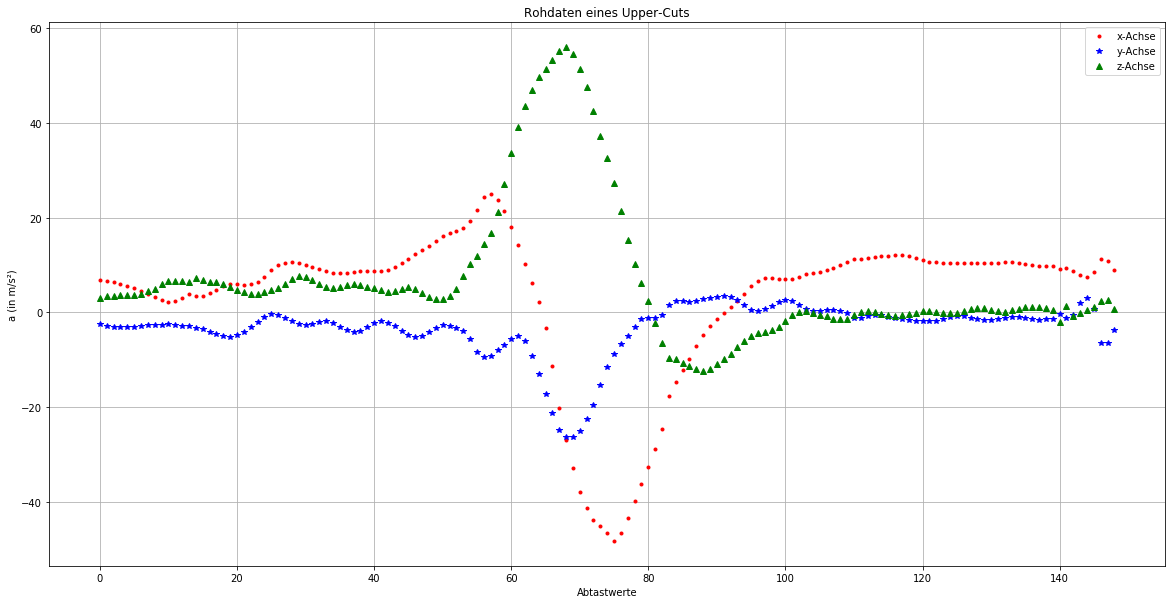

In [119]:
plot_ds(ds[0:1],saveImage=True,imageName='accelero_punch_raw_data.png') # show only the first punch

In [45]:
ds[0]['count']

149

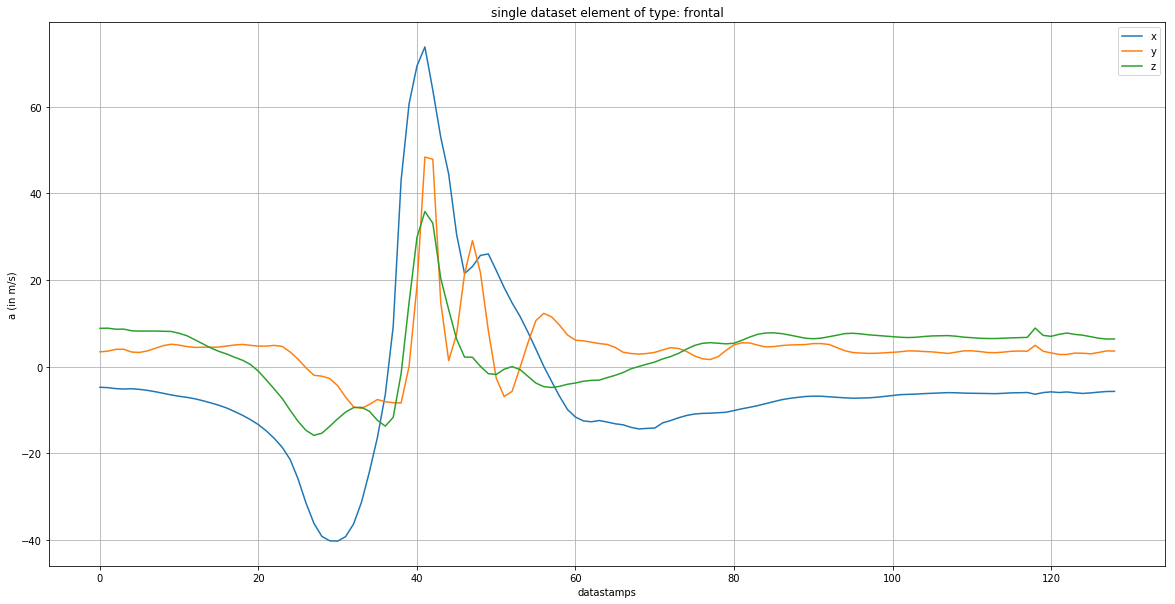

In [10]:
plot_ds_element(ds[11])

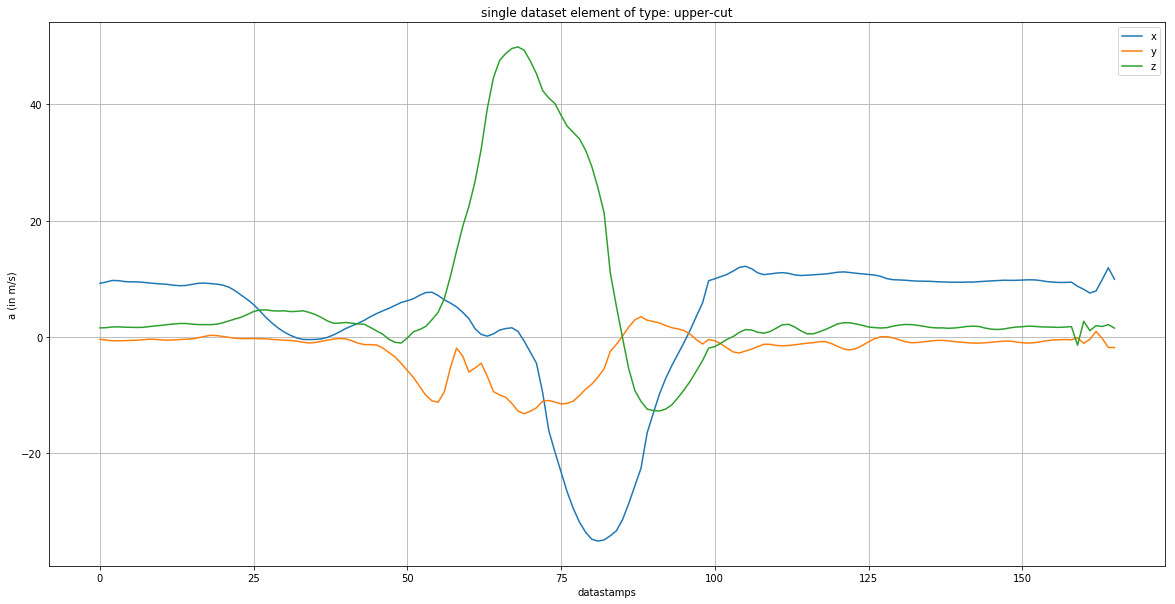

In [11]:
plot_ds_element(ds[9])

In [12]:
raws = ds[1]['raws']
raws[2]
print(raws[0])

{'_id': {'$oid': '5c5e933a6d627a480d243c1e'}, 'timestamp': '0', 'x': 8.322237014770508, 'y': -1.923829436302185, 'z': 4.405186653137207}


       label  datastamps avg
0  upper-cut      126.176784
1    frontal      118.909091
2       hook      133.671852
3  no-action      257.719542


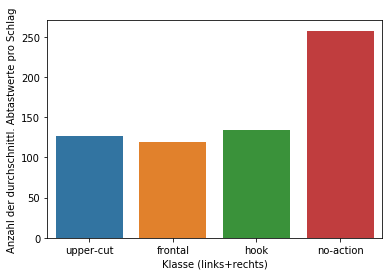

In [57]:
def print_label_stamp_ratio():
    labels = []

    # seperate unique labels and count ratio
    for el in ds:
        if not any(el['label'] in seperatedList for seperatedList in labels):
                labels.append([el['label'],len(el['raws']),1])

        else:
                for label in labels:
                    if  label[0] == el['label']:
                        label[1] += len(el['raws'])
                        label[2] += 1
    for stamps in labels:
        stamps[1] = stamps[1]/stamps[2]
        
   # convert list to dataframe for plotting the dataframe
    df = pd.DataFrame(labels,columns=['label','datastamps avg','abs count']) 
    df.drop('abs count',axis=1,inplace =True)
    print(df)
  # plot label-stamp ratio
    ax = sns.barplot(x=df['label'],y=df['datastamps avg'],data=df)
    ax.set(xlabel='Klasse (links+rechts)', ylabel='Anzahl der durchschnittl. Abtastwerte pro Schlag')
    plt.savefig('label_stamp_ratio.png')
print_label_stamp_ratio()                    

       label  period (ms) avg
0  upper-cut      1247.537274
1    frontal      1178.008942
2       hook      1320.499271
3  no-action      2486.859469


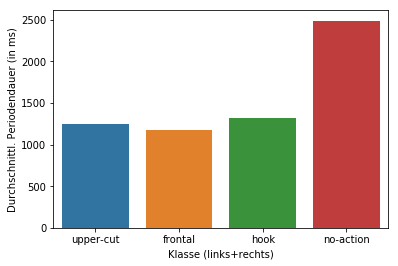

In [101]:
def print_label_period_ratio():
    labels = []

    # seperate unique labels and count ratio
    for el in ds:
        if not any(el['label'] in seperatedList for seperatedList in labels):
                labels.append([el['label'],el['periodNS'],1])

        else:
                for label in labels:
                    if  label[0] == el['label']:
                        label[1] += el['periodNS']
                        label[2] += 1
    for period in labels:
        period[1] = period[1]/period[2]
        period[1] = period[1]/1000000
        
   # convert list to dataframe for plotting the dataframe
    df = pd.DataFrame(labels,columns=['label','period (ms) avg','abs count']) 
    df.drop('abs count',axis=1,inplace =True)
    print(df)
  # plot label-stamp ratio
    ax = sns.barplot(x=df['label'],y=df['period (ms) avg'],data=df)
    ax.set(xlabel='Klasse (links+rechts)', ylabel='Durchschnittl. Periodendauer (in ms)')
    plt.savefig('label_periodLength_ratio.png')
print_label_period_ratio()  

In [20]:
def extract_elementraws_from_dataset(ds):
    x = []
    y = []
    z = []
     
    for el in ds:
          for raw in el['raws']:
                x.append(raw['x'])
                y.append(raw['y'])
                z.append(raw['z'])
    # convert2Series
    s_x = pd.Series(data=x,name='x')
    s_y = pd.Series(data=y,name='y')
    s_z = pd.Series(data=z,name='z')
    return [s_x,s_y,s_z]
    

# Differences between left and right hand data
The following section shows the accelerometer values depending on the boxers hand. It can be seen that the types vary in their sign.

## Punch: Frontal with left hand

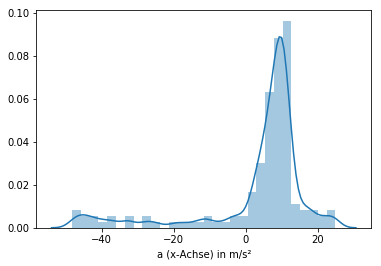

In [24]:
raws = extract_elementraws_from_dataset(ds[0:1])
sns.distplot(raws[0],axlabel="a (x-Achse) in m/s²")

## Punch: Frontal with right hand

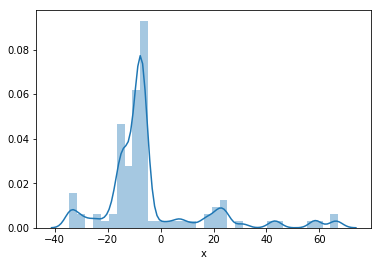

In [17]:
raws = extract_elementraws_from_dataset(ds[34:35])
sns.distplot(raws[0])

# Variation between the variables x,y,z


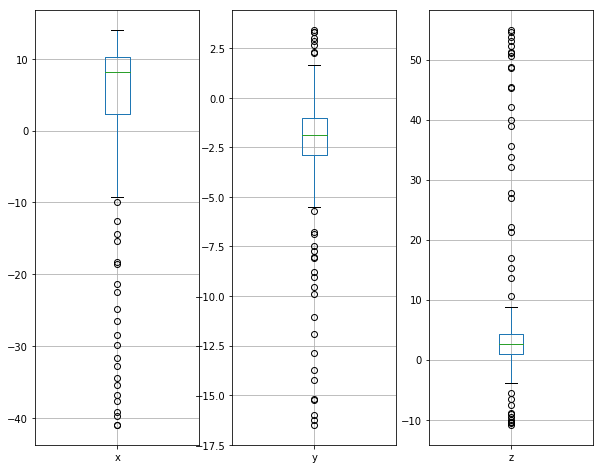

In [18]:
raws = extract_elementraws_from_dataset(ds[1:2])
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
raws[0].plot.box(grid=1)
plt.subplot(1,3,2)
raws[1].plot.box(grid=1)
plt.subplot(1,3,3)
raws[2].plot.box(grid=1)

In [113]:
def universal_plotter_for_single_axis(list_of_datasets,
                                                                       list_of_axis_to_plot,
                                                                       list_of_dataset_legend_titles,
                                                                       plot_title, y_axis_label, x_axis_label,
                                                                       figSizeTupel = (20,10)):
    """Plots a specific axis of multiple datasets of an given array.
           Converting mechanism is made for the notation style of the smartPunch project.

    Args:
        list_of_datasets (list): List of datasets
        
        list_of_axis_to_plot (list): List of strings containig the axis to plot for the dataset of specific array index
    
        list_of_dataset_legend_titles (list): List strings containing the legend titles for each dataset axis.
        
        plot_title, y_axis_label , x_axis_label (str): Plot title, x and y plot axis labels
        
        figSizeTupel (tupel): Figure size
        
    Returns:
        void
    """   
    
    fig, ax = plt.subplots(figsize=figSizeTupel)

    idx = 0;
    for curDataSet in list_of_datasets:
        ax.plot(curDataSet['raws']['timestamp'].values,curDataSet[list_of_axis_to_plot[idx]], label=list_of_dataset_legend_titles[idx])
        idx+=1;
    
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label,
           title=plot_title)
    ax.grid()
    plt.legend()
    plt.show()

In [105]:
# timeseries_plotter.universal_plotter_for_single_axis(ds[0],['x'],['Legend title'],plot_title='Titel hier',y_axis_label='y-Achsen Label',x_axis_label='x-Achsen Label')

TypeError: list indices must be integers or slices, not str

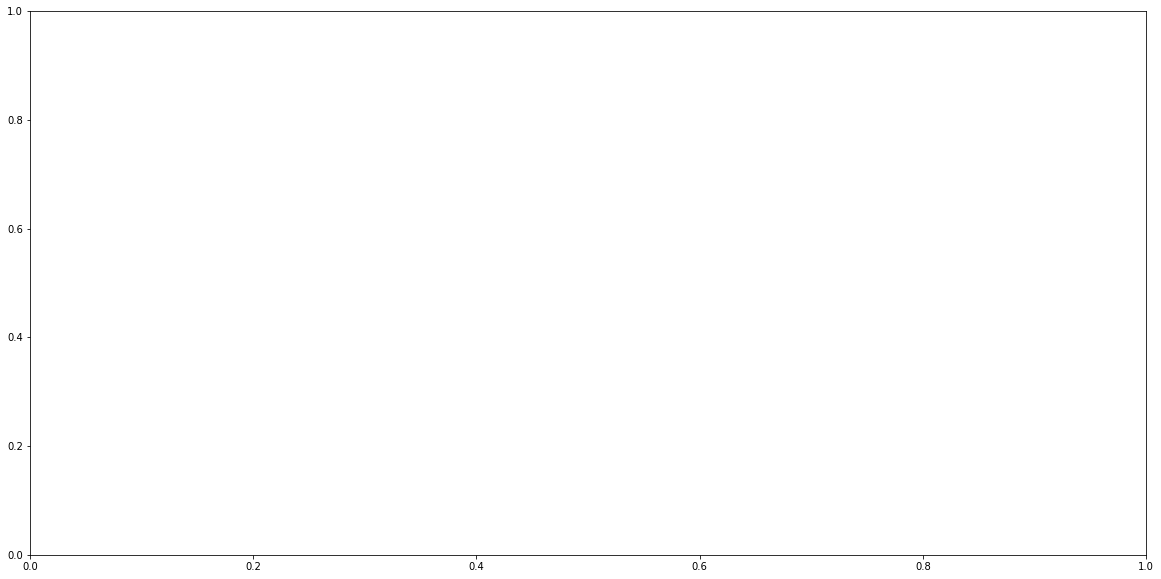

In [114]:
universal_plotter_for_single_axis([ds[0]],['x'],['Legend title'],plot_title='Titel hier',y_axis_label='y-Achsen Label',x_axis_label='x-Achsen Label')

In [111]:
ds[0]['timestamp'].values

KeyError: 'timestamp'

In [112]:
ds[0]

{'_id': {'$oid': '5c5e933a6d627a480d243b88'},
 'label': 'upper-cut',
 'hand': 'right',
 'annotator': '0',
 'count': 149,
 'periodNS': 1489000000,
 'raws': [{'_id': {'$oid': '5c5e933a6d627a480d243af3'},
   'timestamp': '0',
   'x': 6.7932233810424805,
   'y': -2.383251428604126,
   'z': 2.9623143672943115},
  {'_id': {'$oid': '5c5e933a6d627a480d243af4'},
   'timestamp': '2000000',
   'x': 6.601797580718994,
   'y': -2.871387243270874,
   'z': 3.359523057937622},
  {'_id': {'$oid': '5c5e933a6d627a480d243af5'},
   'timestamp': '14000000',
   'x': 6.343372821807861,
   'y': -3.129812002182007,
   'z': 3.5581271648406982},
  {'_id': {'$oid': '5c5e933a6d627a480d243af6'},
   'timestamp': '12000000',
   'x': 5.962913990020752,
   'y': -3.136990547180176,
   'z': 3.625126361846924},
  {'_id': {'$oid': '5c5e933a6d627a480d243af7'},
   'timestamp': '4000000',
   'x': 5.582455158233643,
   'y': -3.1034910678863525,
   'z': 3.6083765029907227},
  {'_id': {'$oid': '5c5e933a6d627a480d243af8'},
   'tim